<a href="https://colab.research.google.com/github/rifat19331279/Practice_files/blob/master/pytorch%20version%20multiclass%20to%20binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torch import cat, no_grad
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (Module, Conv2d, Linear, Dropout2d, NLLLoss,
                     MaxPool2d, Flatten, Sequential, ReLU)
import torch.nn.functional as F

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

In [3]:
X_train = datasets.CIFAR10(root='./data', train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))

classes=['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified


In [4]:
idx= []
for i in range(len(X_train)):
  if X_train[i][1] in [2,8]:
        idx.append(X_train[i])

In [5]:
len(idx)
idx[10]

(tensor([[[0.6118, 0.6549, 0.6627,  ..., 0.9529, 0.9020, 0.8157],
          [0.6824, 0.7529, 0.6745,  ..., 0.9294, 0.8353, 0.7294],
          [0.7529, 0.7608, 0.6824,  ..., 0.8863, 0.7765, 0.7647],
          ...,
          [0.7333, 0.8275, 0.9059,  ..., 0.8235, 0.8510, 0.7961],
          [0.9059, 0.8627, 0.7843,  ..., 0.7176, 0.7412, 0.7294],
          [0.9333, 0.9333, 0.8980,  ..., 0.5529, 0.5922, 0.6157]],
 
         [[0.7608, 0.8314, 0.8431,  ..., 0.9686, 0.9216, 0.8431],
          [0.8235, 0.8980, 0.8000,  ..., 0.9529, 0.8667, 0.7569],
          [0.9176, 0.9020, 0.7882,  ..., 0.9059, 0.8157, 0.7843],
          ...,
          [0.8275, 0.9176, 0.9569,  ..., 0.8000, 0.8157, 0.7529],
          [0.9333, 0.9255, 0.8588,  ..., 0.6667, 0.6863, 0.6627],
          [0.9490, 0.9686, 0.9373,  ..., 0.4941, 0.5373, 0.5529]],
 
         [[0.5059, 0.4980, 0.5059,  ..., 0.8863, 0.8078, 0.7059],
          [0.5765, 0.6235, 0.6392,  ..., 0.8745, 0.7843, 0.6627],
          [0.5686, 0.6980, 0.7608,  ...,

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
batch_size = 4
n_samples = 100

trainloader = torch.utils.data.DataLoader(idx, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

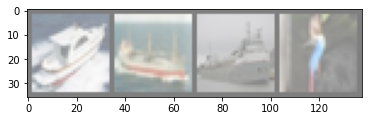

 ship  ship  ship  bird


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

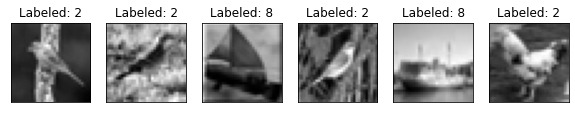

In [8]:
n_samples_show = 6

data_iter = iter(trainloader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_func = NLLLoss()

epochs = 10
loss_list = []
net.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(trainloader):
        optimizer.zero_grad(set_to_none=True) 
        output = net(data)                   
        loss = loss_func(output, target)      
        loss.backward()                        
        optimizer.step()                       
        total_loss.append(loss.item())         
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Training [10%]	Loss: -3256288046557.3120
Training [20%]	Loss: -125292870053448.9062
Training [30%]	Loss: -851906464600975.0000
Training [40%]	Loss: -3058805116343471.5000
Training [50%]	Loss: -8017656280352660.0000
Training [60%]	Loss: -17500200719100150.0000
Training [70%]	Loss: -33758862897295288.0000
Training [80%]	Loss: -59691303395875040.0000
Training [90%]	Loss: -98863301764606176.0000
Training [100%]	Loss: -155383952051359296.0000


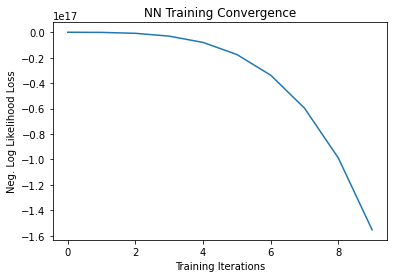

In [11]:
plt.plot(loss_list)
plt.title('NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg. Log Likelihood Loss')
plt.show()

In [12]:
n_samples = 50

X_test = datasets.CIFAR10(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

idx_test= []
for i in range(len(X_test)):
  if X_test[i][1] in [2,8]:
        idx_test.append(X_test[i])

testloader = torch.utils.data.DataLoader(idx_test, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

print(len(X_test))

Files already downloaded and verified
10000


In [13]:
net.eval()
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(testloader):
        output = net(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'
          .format(sum(total_loss) / len(total_loss),
                  correct / len(testloader) / batch_size * 100)
    )

Performance on test data:
	Loss: -161448044292723776.0000
	Accuracy: 50.0%


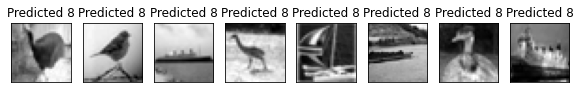

In [14]:
n_samples_show = 8
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

net.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(testloader):
        if count == n_samples_show:
            break
        output = net(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=False)

        axes[count - 1].imshow(data[0, 0].numpy().squeeze(), cmap='gray')

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title('Predicted {}'.format(pred.item()))

        count += 1